# VaR Implementation using different methods 

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import yfinance as yf
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

## Example of Value at Risk:

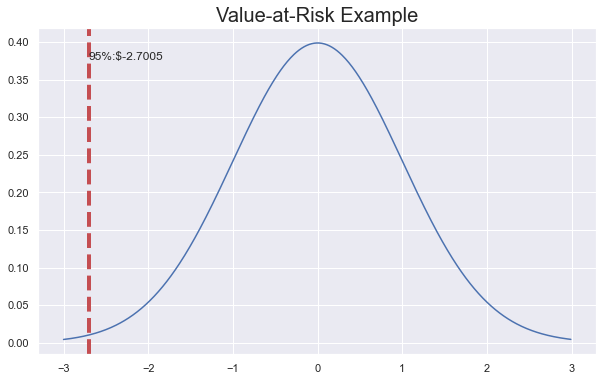

In [116]:
mean = 0
std_dev = 1
x = np.arange(-3, 3, 0.01)
y = norm.pdf(x, mean, std_dev)
pdf = plt.plot(x, y)
min_ylim, max_ylim = plt.ylim()
plt.text(np.percentile(x, 5), max_ylim * 0.9, '95%:${:.4f}'
.format(np.percentile(x, 5)))
plt.axvline(np.percentile(x, 5), color='r', linestyle='dashed', linewidth=4)
plt.title("Value-at-Risk Example", fontsize=20)

plt.show()

## Portfolio parameters choice :

In [160]:
today=datetime.today().strftime("%Y-%m-%d")
stock = ["JPM", "AAPL", "TSLA", "NVDA", "LOW", "LNC"]
start="2021-01-01"
end="2022-01-01"
investment=10**6

data = yf.download(tickers=stock, start=start, end=end)
data = data["Adj Close"]
data

[*********************100%***********************]  6 of 6 completed


,AAPL,JPM,LNC,LOW,NVDA,TSLA
Date,,,,,,
2020-12-31,131.515976,122.311935,48.288616,157.087433,130.386307,705.669983
2021-01-04,128.264984,121.156876,46.858482,156.960220,130.970551,729.770020
2021-01-05,129.850830,121.816124,47.136829,157.488693,133.879410,735.109985
2021-01-06,125.479851,127.536095,50.457813,159.592850,125.986824,755.979980
2021-01-07,129.761612,131.724274,50.515404,160.219223,133.272659,816.039978
...,...,...,...,...,...,...
2021-12-27,179.836319,156.060837,67.908081,251.847137,309.331909,1093.939941
2021-12-28,178.799164,156.534454,67.671265,252.164795,303.104248,1088.469971
2021-12-29,178.888916,156.455521,67.927818,255.688873,299.895508,1086.189941


## Data Preprocessing-Data Viz : 

In [157]:
def data_info(data, start, end, weights, data_title="Adj Closing Price for 2021"):
    
    data_norm=(data-data.min())/ (data.max() - data.min())
    for column in data_norm.columns:
        plot=data_norm[column].plot()
    plt.title(data_title, fontsize = 18)
    plt.xticks(rotation=45)
    plt.legend(data_norm.columns)
    
    returns = data.pct_change()
    
    mean_returns = returns.mean()
    
    cov_matrix = returns.cov()
    
    port_std = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
    
    #print("The Data:{}".format(pd.DataFrame(data)))
    #print("The normalized Data:{}".format(pd.DataFrame(data_norm)))
    #print("The returns:{}".format(pd.DataFrame(returns)))
    #print("The mean returns:{}".format(mean_returns))
    #print("The covariance matrix:{}".format(cov_matrix))
    print(plot)
    
    return data,data_norm,returns,mean_returns,cov_matrix,port_std


AxesSubplot(0.125,0.2;0.775x0.68)


(                  AAPL         JPM        LNC         LOW        NVDA  \
 Date                                                                    
 2020-12-31  131.515976  122.311935  48.288616  157.087433  130.386307   
 2021-01-04  128.264984  121.156876  46.858486  156.960220  130.970581   
 2021-01-05  129.850815  121.816124  47.136833  157.488693  133.879410   
 2021-01-06  125.479851  127.536102  50.457809  159.592865  125.986809   
 2021-01-07  129.761627  131.724289  50.515404  160.219208  133.272659   
 ...                ...         ...        ...         ...         ...   
 2021-12-27  179.836319  156.060837  67.908081  251.847137  309.331909   
 2021-12-28  178.799149  156.534454  67.671257  252.164810  303.104279   
 2021-12-29  178.888916  156.455521  67.927818  255.688873  299.895508   
 2021-12-30  177.712143  156.376572  67.631798  254.517517  295.747070   
 2021-12-31  177.083878  156.248322  67.355507  256.592255  293.997742   
 
                    TSLA  
 Date    

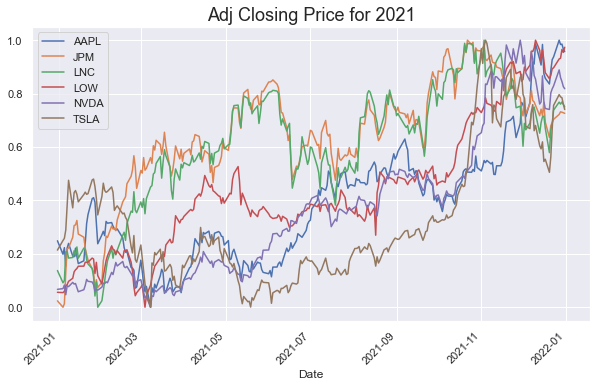

In [158]:
data_info(data=data, start=start, end=end, weights=weights)

In [62]:
data.corr()

,AAPL,JPM,LNC,LOW,NVDA,TSLA
AAPL,1.000000,0.376594,0.405885,0.833089,0.890458,0.695641
JPM,0.376594,1.000000,0.970644,0.677640,0.612020,0.253555
LNC,0.405885,0.970644,1.000000,0.705596,0.621261,0.258373
LOW,0.833089,0.677640,0.705596,1.000000,0.915015,0.706167
NVDA,0.890458,0.612020,0.621261,0.915015,1.000000,0.749956
TSLA,0.695641,0.253555,0.258373,0.706167,0.749956,1.000000


<AxesSubplot:>

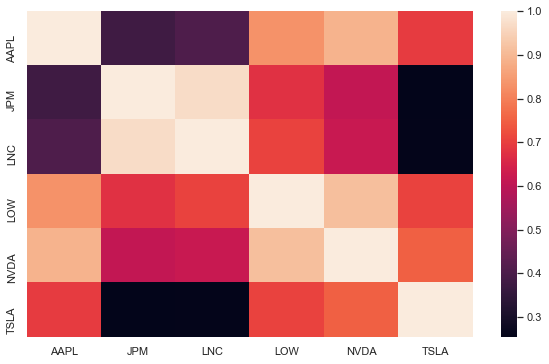

In [63]:
sns.heatmap(data.corr())

In [69]:
weights = np.random.random(len(returns.columns))
weights /= np.sum(weights)

AxesSubplot(0.125,0.2;0.775x0.68)


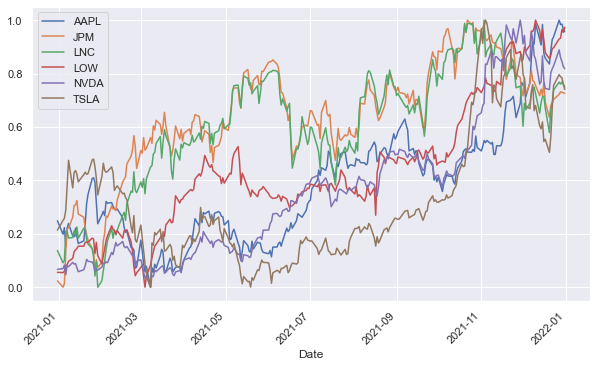

In [87]:
data,data_norm,returns,mean_returns,cov_matrix,port_std=data_info(data=data, start=start, end=end,weights=weights)
returns=returns.dropna()
cov=cov_matrix
returns["portfolio"] = returns.dot(weights)

## Parametric VaR :

In [101]:
def VaR_parametric(pf_returns, pf_std, distribution, conf_level, deg_freedom=None, lambdaa=None, k=None, theta=None):
    
    if distribution == "normal":
        VaR = norm.ppf(conf_level)*pf_std - pf_returns
    elif distribution == "t-distribution":
        nu = deg_freedom
        VaR = np.sqrt((nu-2)/nu) * t.ppf(conf_level, nu)* pf_std - pf_returns
    elif distribution =="exponential":
        VaR=-1/lambdaa*np.ln(conf_level)* pf_std - pf_returns
    elif distribution == "pareto":
        from scipy.stats import pareto
        VaR=k*(np.power(conf_level,(-1/theta))-1)* pf_std - pf_returns
    else:
        raise TypeError(" Error: Unsupported distribution, please type either : normal ; t-distribution; exponential; pareto ")
        
    return VaR

In [102]:
print(VaR_parametric(pf_returns=returns["portfolio"], pf_std=port_std, distribution="normal", conf_level=0.97))

print(VaR_parametric(pf_returns=returns["portfolio"], pf_std=port_std, distribution="pareto", conf_level=0.97, k=2, theta=3))


Date
2021-01-04    0.027461
2021-01-05    0.022219
2021-01-06    0.005091
2021-01-07   -0.010722
2021-01-08    0.003713
                ...   
2021-12-27    0.011159
2021-12-28    0.032465
2021-12-29    0.028035
2021-12-30    0.037215
2021-12-31    0.033882
Name: portfolio, Length: 252, dtype: float64
Date
2021-01-04   -0.001805
2021-01-05   -0.007047
2021-01-06   -0.024176
2021-01-07   -0.039989
2021-01-08   -0.025554
                ...   
2021-12-27   -0.018108
2021-12-28    0.003198
2021-12-29   -0.001232
2021-12-30    0.007948
2021-12-31    0.004615
Name: portfolio, Length: 252, dtype: float64


## Historical VaR :

In [144]:
def historicalVaR(returns, conf_level):

    if isinstance(returns, pd.Series):
        return np.percentile(returns, 1-conf_level)
    # A passed user-defined-function will be passed a Series for evaluation.
    elif isinstance(returns, pd.DataFrame):
        return returns.aggregate(historicalVaR, 1-conf_level)
    else:
        raise TypeError("Expected returns to be dataframe or series")
    hVaR = historicalVaR(returns['portfolio'], conf_level)*np.sqrt(Time)
    return hVaR


In [150]:
#historicalVaR(returns['portfolio'], conf_level=0.97)*np.sqrt(90)


-0.43439102851155426

In [172]:
hVaR = -historicalVaR(returns['portfolio'], conf_level=0.97)*np.sqrt(T)
hVaR

0.43439102851155426

## Monte Carlo VaR :

In [173]:
mc_sims = 1000 
T = 90 
meanM = np.full(shape=(T, len(weights)), fill_value=mean_returns)
meanM = meanM.T
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(cov_matrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*investment

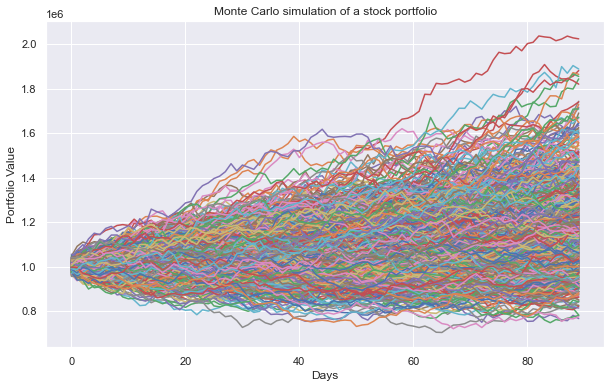

In [174]:
plt.plot(portfolio_sims)
plt.ylabel("Portfolio Value")
plt.xlabel("Days")
plt.title("Monte Carlo simulation of a stock portfolio")
plt.show()

In [183]:
def MCVaR(returns, conf_level):
    return np.percentile(returns, conf_level)

MCVaR(returns["portfolio"],0.97)

-0.0353642036613359

In [184]:
print("\nVaR:")
print(' Historical VaR 97th CI:', round(-investment*hVaR,2))
print(" Normal VaR 97th CI:", round(investment*VaR_parametric(pf_returns=returns["portfolio"].sum(), pf_std=port_std, distribution="normal", conf_level=0.97),2))
print(" Monte Carlo VaR  97th CI:", round(investment*MCVaR(returns["portfolio"],0.97),2))


VaR:
 Historical VaR 97th CI: -434391.03
 Normal VaR 97th CI: -425472.29
 Monte Carlo VaR  97th CI: -35364.2
